In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install seaborn
!pip install statsmodels

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:14407 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp17_6m1tb
  JVM stdout: /tmp/tmp17_6m1tb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp17_6m1tb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:14407
Connecting to H2O server at http://127.0.0.1:14407 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_fjvsdq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#For H2O
url = "https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#For Pandas
df_pd=pd.read_csv('https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv')
df_pd.head()
df_pd_org=df_pd.copy()

In [ ]:
#First five rows
df_pd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Get Stats of all the columns
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Description of all the columns 
df_pd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 From the table above, we can see there are some missing vales for BMI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between Age and Stroke')

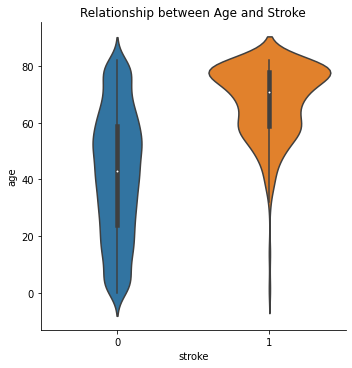

In [ ]:
#Relation between age and stroke
sns.catplot('stroke','age',data=df_pd_org,kind='violin')
plt.title('Relationship between Age and Stroke')

 From the diagram above, we can see age is an important factor in predicting stroke. With the increase in age, the changes of stroke increases

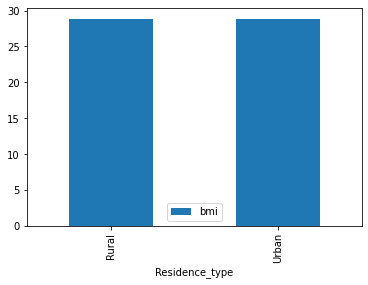

In [ ]:
df_pd_org[['Residence_type','bmi']].groupby('Residence_type').mean('bmi').plot(kind='bar') # Relation residence type and BMI


 BMI is not varying for Rural and Urban

Text(0.5, 1.0, 'Relationship between glucose level and work type')

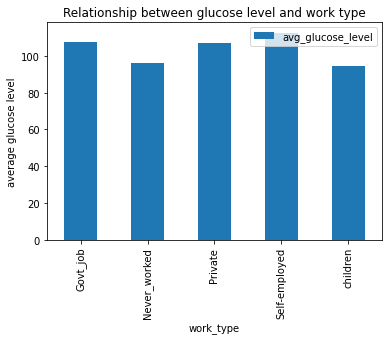

In [ ]:
df_pd_org[['work_type','avg_glucose_level']].groupby('work_type').mean('avg_glucose_level').plot(kind='bar')
plt.ylabel('average glucose level')
plt.title('Relationship between glucose level and work type')

No significant result found


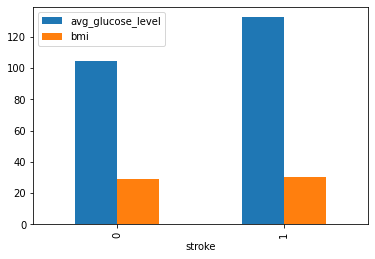

In [ ]:
# Relation for stroke with bmi and average
df_pd_org[['stroke','avg_glucose_level','bmi']].groupby('stroke').mean(['bmi','avg_glucose_level']).plot(kind='bar')

It seems BMI not playing a great role in heart prediction. But we won't ignore it for now


Text(0.5, 1.1, 'Chance of Getting Stroke Based on Smoking Behavior')

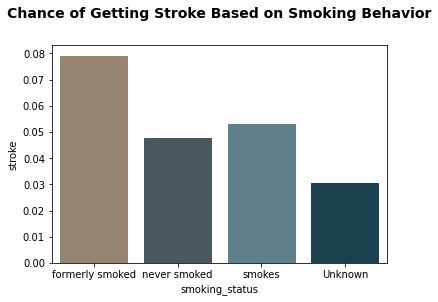

In [ ]:
palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
ax = sns.barplot(data=df_pd_org, x='smoking_status', y='stroke',
            palette=palettes, edgecolor=palettes, ci=None)

ax.set_title('Chance of Getting Stroke Based on Smoking Behavior', y=1.1, weight='bold', fontsize=14)

One who smokes or has formerly smoked may have a higher risk of stroke

In [ ]:
#Find the correlation
corr_matrix = df_pd_org.corr()
corr_matrix


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [ ]:
 # Find how much each attribue correlates to Stroke
 corr_matrix["stroke"].sort_values(ascending=False)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

Age, heart_disease. glucose level and hypertension may play a significant role in stroke prediction

In [ ]:
df_pd.dropna(inplace=True) # vif can't be calculated with nan values
df_pd = df_pd._get_numeric_data() # drop non-numeric cols aka categorical vars




In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df_pd[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,age,5.831218
1,hypertension,1.187969
2,heart_disease,1.139760
3,avg_glucose_level,6.069581
4,bmi,8.162154


 They may be some collinearity between age, avg glucose level and BMI as their VIF is high

In [ ]:
df_pd_org=df_pd_org.drop('id',axis=1,inplace=False)
df_pd_org.corr(method='pearson')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


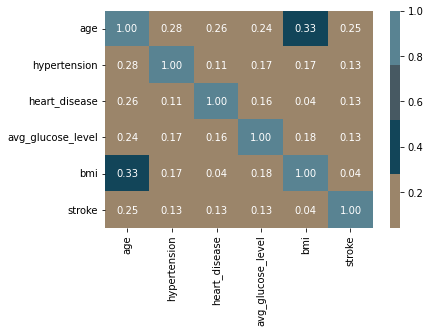

In [ ]:
#from IPython.core.pylabtools import figsize
#f,ax=plt.subplots(figsize=(6,6))
#sns.heatmap(df_pd_org.corr(),center=0, linewidths=0.8,cmap='Greens',annot=True)
from matplotlib import colors
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])
sns.heatmap(df_pd_org.corr(), annot=True, fmt='.2f', cmap=cmap)


ID has no role to predict stroke. Furthermore, correlation between bmi and stroke is very low (under 0.05)

In [ ]:
# Map stroke to Yes for 1 and No for 0 as stroke_category
df['stroke_category'] = df['stroke'].asfactor()
df["stroke_category"] = (df["stroke"] == 1).ifelse("Yes", "No")
df.head()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1,Yes
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1,Yes
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1,Yes
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Yes
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Yes
27419,Female,59,0,0,Yes,Private,Rural,76.15,nan,Unknown,1,Yes
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Yes


Mapped stroke to category of Yes and No for H2O AutoML Learning

In [ ]:
#Get the type of data
df.types

{'Residence_type': 'enum',
 'age': 'real',
 'avg_glucose_level': 'real',
 'bmi': 'real',
 'ever_married': 'enum',
 'gender': 'enum',
 'heart_disease': 'int',
 'hypertension': 'int',
 'id': 'int',
 'smoking_status': 'enum',
 'stroke': 'int',
 'stroke_category': 'enum',
 'work_type': 'enum'}

In [ ]:
# Get Idea of Categorical Variable
for feature in df.columns:
  if df[feature].types[feature] not in ['real','int']:


    print(f'{feature}: {df[feature].unique()}')

C1
Female
Male
Other


gender: 


C1
No
Yes


ever_married: 


C1
Govt_job
Never_worked
Private
Self-employed
children


work_type: 


C1
Rural
Urban


Residence_type: 


C1
Unknown
formerly smoked
never smoked
smokes


smoking_status: 


C1
No
Yes


stroke_category: 


In [ ]:
#Get data shape
df.shape

(5110, 13)

In [ ]:
#Get stats of air data

df.describe()

Rows:5110
Cols:13




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
type,int,enum,real,int,int,enum,enum,enum,real,real,enum,int,enum
mins,67.0,,0.08,0.0,0.0,,,,55.12,10.3,,0.0,
mean,36517.829354207424,,43.22661448140898,0.0974559686888454,0.05401174168297456,,,,106.1476771037182,28.893236911794656,,0.04872798434442271,
maxs,72940.0,,82.0,1.0,1.0,,,,271.74,97.6,,1.0,
sigma,21161.72162482717,,22.612646723113485,0.2966066742337912,0.22606298750336545,,,,45.28356015058197,7.854066729680164,,0.2153198569802376,
zeros,0,,0,4612,4834,,,,0,0,,4861,
missing,0,0,0,0,0,0,0,0,0,201,0,0,0
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,Yes
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,nan,never smoked,1.0,Yes
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0,Yes


In [ ]:
#Check if there are any null values
df.isna().sum()

201.0

This is related to the null bmi values but it is not a great deal

In [ ]:
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
# Get the shape of the train and test
print(df_train.shape)
print(df_test.shape)

(4102, 13)
(1008, 13)


In [ ]:
#Get Sample top 10 of train
df_train.head()


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1,Yes
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1,Yes
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Yes
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Yes
27419,Female,59,0,0,Yes,Private,Rural,76.15,nan,Unknown,1,Yes
12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,Yes
12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,Yes
12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1,Yes


In [ ]:
# Features and Target
X=df.columns
print(X)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'stroke_category']


In [ ]:
#Separate features and target
y ='stroke'
y_category='stroke_category'
X.remove(y)
X.remove('id') # Remove id as it is useless
X.remove(y_category) 
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=123)

In [ ]:
aml.train(x=X,y=y_category,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220214_21048_model_9


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.038533574072710186
RMSE: 0.19629970471885633
LogLoss: 0.14086366074423257
Mean Per-Class Error: 0.3157086590408354
AUC: 0.8922807322005251
AUCPR: 0.37990516081619474
Gini: 0.7845614644010501

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22508084774017334: 


,,No,Yes,Error,Rate
0,No,3787.0,111.0,0.0285,(111.0/3898.0)
1,Yes,123.0,81.0,0.6029,(123.0/204.0)
2,Total,3910.0,192.0,0.057,(234.0/4102.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.225081,0.409091,92.0
1,max f2,0.139117,0.501580,168.0
2,max f0point5,0.264554,0.429687,65.0
3,max accuracy,0.435266,0.953437,15.0
4,max precision,0.552039,1.000000,0.0
5,max recall,0.009357,1.000000,384.0
6,max specificity,0.552039,1.000000,0.0
7,max absolute_mcc,0.225081,0.379343,92.0
8,max min_per_class_accuracy,0.067742,0.813494,257.0
9,max mean_per_class_accuracy,0.063597,0.818668,264.0



Gains/Lift Table: Avg response rate:  4.97 %, avg score:  5.02 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010239,0.345502,11.490196,11.490196,0.571429,0.432481,0.571429,0.432481,0.117647,0.117647,1049.019608,1049.019608,0.113029
1,2,0.020234,0.285767,9.318269,10.417316,0.463415,0.308972,0.518072,0.371471,0.093137,0.210784,831.826877,941.731632,0.200523
2,3,0.030229,0.256939,7.846963,9.567441,0.390244,0.269105,0.475806,0.337624,0.078431,0.289216,684.696318,856.744149,0.272540
3,4,0.040224,0.234469,6.375658,8.774332,0.317073,0.244017,0.436364,0.314364,0.063725,0.352941,537.565758,777.433155,0.329083
4,5,0.050219,0.220255,4.904352,8.004093,0.243902,0.226931,0.398058,0.296962,0.049020,0.401961,390.435198,700.409290,0.370150
5,6,0.100195,0.149043,3.825395,5.919827,0.190244,0.183072,0.294404,0.240156,0.191176,0.593137,282.539455,491.982730,0.518740
6,7,0.150171,0.102279,2.059828,4.635250,0.102439,0.123104,0.230519,0.201202,0.102941,0.696078,105.982783,363.524955,0.574478
7,8,0.200146,0.074879,1.569393,3.869719,0.078049,0.087817,0.192448,0.172890,0.078431,0.774510,56.939264,286.971890,0.604423
8,9,0.300098,0.044114,0.980870,2.907552,0.048780,0.057122,0.144598,0.134332,0.098039,0.872549,-1.912960,190.755165,0.602410
9,10,0.400049,0.026505,0.539479,2.315894,0.026829,0.034851,0.115174,0.109477,0.053922,0.926471,-46.052128,131.589418,0.553972




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.04243384640101634
RMSE: 0.20599477275168013
LogLoss: 0.15810573516378656
Mean Per-Class Error: 0.27058622320144066
AUC: 0.8460246078934396
AUCPR: 0.21910721660889698
Gini: 0.6920492157868792

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1170614595924105: 


,,No,Yes,Error,Rate
0,No,3470.0,428.0,0.1098,(428.0/3898.0)
1,Yes,88.0,116.0,0.4314,(88.0/204.0)
2,Total,3558.0,544.0,0.1258,(516.0/4102.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.117061,0.310160,195.0
1,max f2,0.100168,0.434337,215.0
2,max f0point5,0.318838,0.266990,42.0
3,max accuracy,0.600236,0.950512,0.0
4,max precision,0.600236,1.000000,0.0
5,max recall,0.009365,1.000000,386.0
6,max specificity,0.600236,1.000000,0.0
7,max absolute_mcc,0.111328,0.294500,201.0
8,max min_per_class_accuracy,0.056991,0.773217,274.0
9,max mean_per_class_accuracy,0.056991,0.776314,274.0



Gains/Lift Table: Avg response rate:  4.97 %, avg score:  5.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010239,0.339869,9.096405,9.096405,0.452381,0.427449,0.452381,0.427449,0.093137,0.093137,809.640523,809.640523,0.087237
1,2,0.020234,0.284213,3.433046,6.298842,0.170732,0.304110,0.313253,0.366522,0.034314,0.127451,243.304639,529.884243,0.112828
2,3,0.030229,0.252436,3.923482,5.513441,0.195122,0.268722,0.274194,0.334185,0.039216,0.166667,292.348159,451.344086,0.143578
3,4,0.040224,0.231656,2.942611,4.874629,0.146341,0.242022,0.242424,0.311284,0.029412,0.196078,194.261119,387.462864,0.164011
4,5,0.050219,0.213761,5.885222,5.075766,0.292683,0.222656,0.252427,0.293645,0.058824,0.254902,488.522238,407.576623,0.215395
5,6,0.100195,0.148868,3.531133,4.305329,0.175610,0.180183,0.214112,0.237052,0.176471,0.431373,253.113343,330.532894,0.348510
6,7,0.150171,0.104007,3.334959,3.982398,0.165854,0.124164,0.198052,0.199484,0.166667,0.598039,233.495935,298.239750,0.471308
7,8,0.200146,0.076589,1.667480,3.404373,0.082927,0.089843,0.169306,0.172107,0.083333,0.681373,66.747967,240.437296,0.506411
8,9,0.300098,0.045025,1.226088,2.678868,0.060976,0.058533,0.133225,0.134280,0.122549,0.803922,22.608800,167.886781,0.530191
9,10,0.400049,0.027912,0.784696,2.205614,0.039024,0.036245,0.109689,0.109786,0.078431,0.882353,-21.530368,120.561351,0.507545




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.882261,0.024670,0.870889,0.857491,0.878049,0.923171,0.881707
1,auc,0.846794,0.022449,0.859318,0.854597,0.809496,0.866746,0.843814
2,err,0.117739,0.024670,0.129111,0.142509,0.121951,0.076829,0.118293
3,err_count,96.600000,20.280533,106.000000,117.000000,100.000000,63.000000,97.000000
4,f0point5,0.261580,0.038740,0.255403,0.246046,0.235955,0.329670,0.240826
5,f1,0.322877,0.026761,0.329114,0.323699,0.295775,0.363636,0.302158
6,f2,0.428529,0.036233,0.462633,0.472973,0.396226,0.405405,0.405405
7,lift_top_group,9.404336,3.014046,11.124661,6.674797,6.666666,8.888889,13.666667
8,logloss,0.158107,0.006641,0.154951,0.155742,0.169788,0.153378,0.156676
9,max_per_class_error,0.441341,0.098419,0.365854,0.317073,0.487805,0.560976,0.475000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:13:06,34.672 sec,0.0,0.500000,0.693147,0.500000,0.049732,1.000000,0.950268
1,,2022-02-14 02:13:06,34.713 sec,5.0,0.238604,0.247865,0.748456,0.234173,10.724183,0.124817
2,,2022-02-14 02:13:06,34.745 sec,10.0,0.208434,0.180224,0.833216,0.286468,11.011438,0.074110
3,,2022-02-14 02:13:06,34.781 sec,15.0,0.203397,0.162011,0.853706,0.299266,11.490196,0.105071
4,,2022-02-14 02:13:06,34.826 sec,20.0,0.201494,0.154724,0.868185,0.317118,11.968954,0.101170
5,,2022-02-14 02:13:06,34.872 sec,25.0,0.200307,0.150806,0.873136,0.329844,11.968954,0.105802
6,,2022-02-14 02:13:07,34.933 sec,30.0,0.199322,0.147865,0.879983,0.344915,12.447712,0.085080
7,,2022-02-14 02:13:07,34.991 sec,35.0,0.198331,0.145340,0.884951,0.353563,12.447712,0.080936
8,,2022-02-14 02:13:07,35.049 sec,40.0,0.197635,0.143663,0.887511,0.364779,12.447712,0.079961
9,,2022-02-14 02:13:07,35.106 sec,45.0,0.196972,0.142204,0.890267,0.370218,11.968954,0.081180



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,255.017548,1.000000,0.519224
1,bmi,105.340950,0.413073,0.214477
2,avg_glucose_level,78.805977,0.309022,0.160451
3,work_type.Self-employed,9.091949,0.035652,0.018511
4,hypertension,9.001845,0.035299,0.018328
5,smoking_status.never smoked,8.488635,0.033286,0.017283
6,heart_disease,8.186159,0.032100,0.016667
7,smoking_status.smokes,3.856948,0.015124,0.007853
8,ever_married.No,3.851197,0.015102,0.007841
9,smoking_status.formerly smoked,2.847352,0.011165,0.005797


Cross validation data auc is 0.83 and max accuracy of 0.95

In [ ]:
aml.leaderboard.as_data_frame()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,XGBoost_grid_1_AutoML_1_20220214_21048_model_9,0.846025,0.158106,0.219107,0.270586,0.205995,0.042434
1,XGBoost_grid_1_AutoML_1_20220214_21048_model_2,0.845385,0.158774,0.217554,0.277811,0.206288,0.042555
2,StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_21048,0.843730,0.158299,0.187876,0.277270,0.207322,0.042982
3,StackedEnsemble_AllModels_1_AutoML_1_20220214_21048,0.840904,0.159448,0.184957,0.282429,0.207925,0.043233
4,StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_21048,0.840385,0.159077,0.186366,0.278296,0.207484,0.043050
5,GBM_grid_1_AutoML_1_20220214_21048_model_11,0.840376,0.158951,0.215329,0.310384,0.206852,0.042788
6,XGBoost_grid_1_AutoML_1_20220214_21048_model_7,0.840145,0.159408,0.210975,0.265858,0.207138,0.042906
7,XGBoost_grid_1_AutoML_1_20220214_21048_model_8,0.839933,0.160031,0.209092,0.287615,0.207927,0.043234
8,StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_21048,0.839410,0.159383,0.186564,0.264617,0.207487,0.043051
9,StackedEnsemble_AllModels_2_AutoML_1_20220214_21048,0.839140,0.159797,0.185055,0.287088,0.207904,0.043224


In [ ]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_1_20220214_21048_model_9,0.846025,0.158106,0.219107,0.270586,0.205995,0.0424338
XGBoost_grid_1_AutoML_1_20220214_21048_model_2,0.845385,0.158774,0.217554,0.277811,0.206288,0.0425546
StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_21048,0.84373,0.158299,0.187876,0.27727,0.207322,0.0429824
StackedEnsemble_AllModels_1_AutoML_1_20220214_21048,0.840904,0.159448,0.184957,0.282429,0.207925,0.0432327
StackedEnsemble_BestOfFamily_3_AutoML_1_20220214_21048,0.840385,0.159077,0.186366,0.278296,0.207484,0.0430495
GBM_grid_1_AutoML_1_20220214_21048_model_11,0.840376,0.158951,0.215329,0.310384,0.206852,0.0427879
XGBoost_grid_1_AutoML_1_20220214_21048_model_7,0.840145,0.159408,0.210975,0.265858,0.207138,0.0429061
XGBoost_grid_1_AutoML_1_20220214_21048_model_8,0.839933,0.160031,0.209092,0.287615,0.207927,0.0432336
StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_21048,0.83941,0.159383,0.186564,0.264617,0.207487,0.0430507
StackedEnsemble_AllModels_2_AutoML_1_20220214_21048,0.83914,0.159797,0.185055,0.287088,0.207904,0.0432241


XG Boost is the best performing model here

In [ ]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GLM_1_AutoML_1_20220214_21048': 14,
 'XGBoost_grid_1_AutoML_1_20220214_21048_model_9': 0}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [ ]:
best_model.algo

'xgboost'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

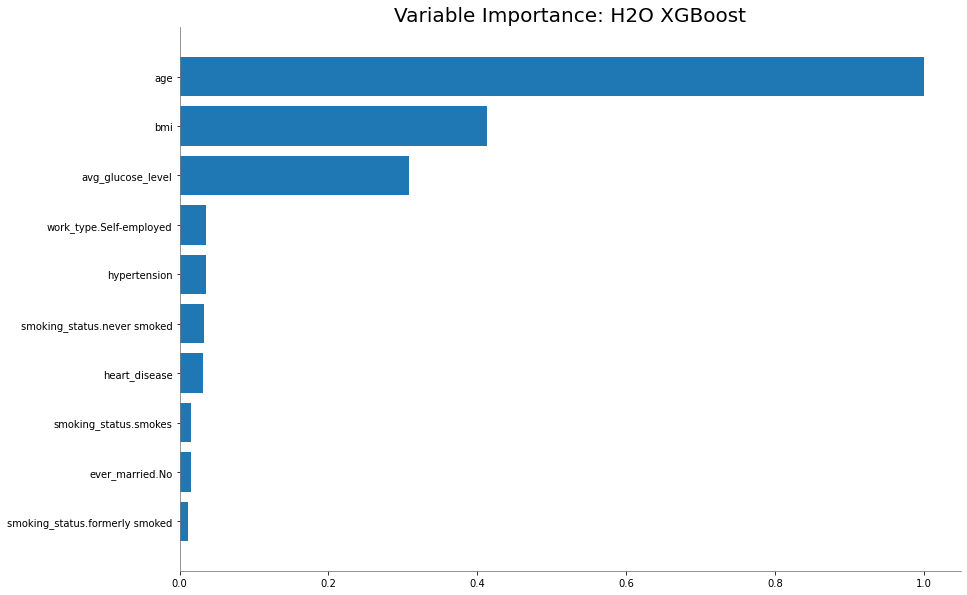

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Age, BMI and glucose level are the most important variables according to XGBoost

14
glm


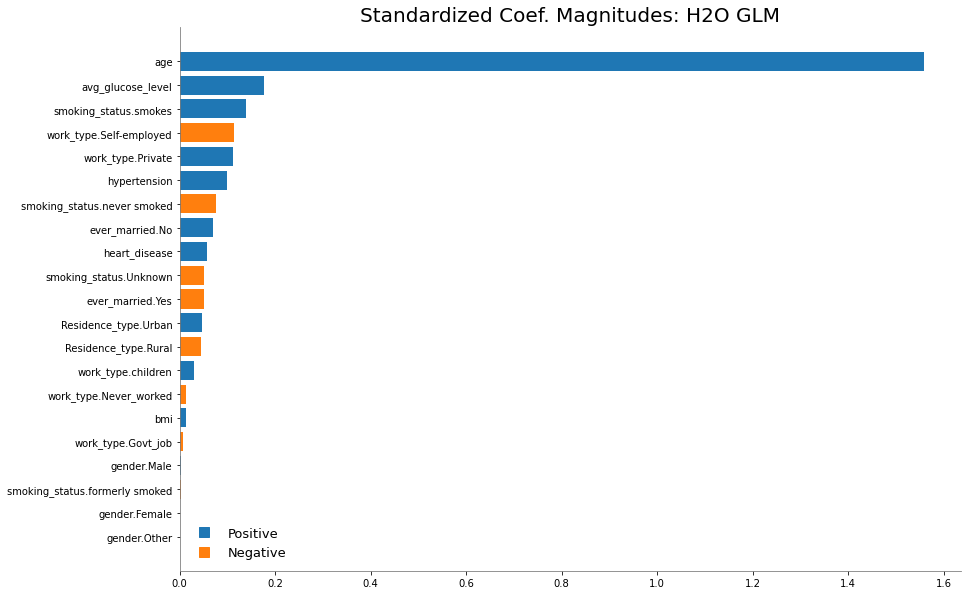

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

H20 GLM also predicts age as the most important variable followed by smoking status and glucose level

In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.8643936771662629,
 'gini': 0.7287873543325258,
 'logloss': 0.14229533933407715,
 'mse': 0.03844023823761837,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.19606182248877105}

Test data auc is 0.86

In [ ]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict,No,Yes
0,No,0.836743,0.163257
1,Yes,0.674523,0.325477
2,No,0.889992,0.110008
3,No,0.833451,0.166549
4,No,0.955540,0.044460


In [ ]:
y_test=h2o.as_list(df_test[y_category])
y_test[0:5]

,stroke_category
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [ ]:
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'gender'.


/usr/local/lib/python3.7/dist-packages/h2o/model/model_base.py:1321: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


,gender,mean_response,stddev_response,std_error_mean_response
0,Female,0.050184,0.074542,0.001043
1,Male,0.050253,0.074898,0.001048
2,Other,0.050253,0.074898,0.001048



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'age'.


,age,mean_response,stddev_response,std_error_mean_response
0,0.080000,0.009650,0.004993,0.000070
1,4.391579,0.009650,0.004993,0.000070
2,8.703158,0.009650,0.004993,0.000070
3,13.014737,0.009650,0.004993,0.000070
4,17.326316,0.009650,0.004993,0.000070
5,21.637895,0.009650,0.004993,0.000070
6,25.949474,0.009650,0.004993,0.000070
7,30.261053,0.009650,0.004993,0.000070
8,34.572632,0.009650,0.004993,0.000070
9,38.884211,0.014181,0.007043,0.000099



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'hypertension'.


,hypertension,mean_response,stddev_response,std_error_mean_response
0,0.0,0.048570,0.073501,0.001028
1,1.0,0.060557,0.076153,0.001065



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'heart_disease'.


,heart_disease,mean_response,stddev_response,std_error_mean_response
0,0.0,0.049058,0.073512,0.001028
1,1.0,0.062630,0.077621,0.001086



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'ever_married'.


,ever_married,mean_response,stddev_response,std_error_mean_response
0,No,0.053642,0.077968,0.001091
1,Yes,0.049901,0.074378,0.001040



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'work_type'.


,work_type,mean_response,stddev_response,std_error_mean_response
0,Govt_job,0.051136,0.077028,0.001078
1,Never_worked,0.051712,0.077419,0.001083
2,Private,0.052632,0.078595,0.001099
3,Self-employed,0.045497,0.067425,0.000943
4,children,0.051712,0.077419,0.001083



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'Residence_type'.


,residence_type,mean_response,stddev_response,std_error_mean_response
0,Rural,0.050204,0.074643,0.001044
1,Urban,0.050193,0.074656,0.001044



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'avg_glucose_level'.


,avg_glucose_level,mean_response,stddev_response,std_error_mean_response
0,55.120000,0.042920,0.065272,0.000913
1,66.521053,0.045214,0.068713,0.000961
2,77.922105,0.046687,0.070955,0.000993
3,89.323158,0.040711,0.061236,0.000857
4,100.724211,0.040335,0.061115,0.000855
5,112.125263,0.052145,0.075848,0.001061
6,123.526316,0.052366,0.075803,0.001060
7,134.927368,0.054908,0.078285,0.001095
8,146.328421,0.053530,0.076264,0.001067
9,157.729474,0.053530,0.076264,0.001067



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'bmi'.


,bmi,mean_response,stddev_response,std_error_mean_response
0,10.300000,0.042834,0.062816,0.000879
1,14.894737,0.042834,0.062816,0.000879
2,19.489474,0.041691,0.060826,0.000851
3,24.084211,0.044420,0.063643,0.000890
4,28.678947,0.042006,0.056893,0.000796
5,33.273684,0.040381,0.057824,0.000809
6,37.868421,0.046495,0.063260,0.000885
7,42.463158,0.048734,0.060366,0.000844
8,47.057895,0.059213,0.076721,0.001073
9,51.652632,0.059769,0.077263,0.001081



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_21048_model_9 on column 'smoking_status'.


,smoking_status,mean_response,stddev_response,std_error_mean_response
0,Unknown,0.047182,0.072494,0.001014
1,formerly smoked,0.051137,0.074777,0.001046
2,never smoked,0.048903,0.073319,0.001026
3,smokes,0.055137,0.077998,0.001091


[, , , , , , , , , ]

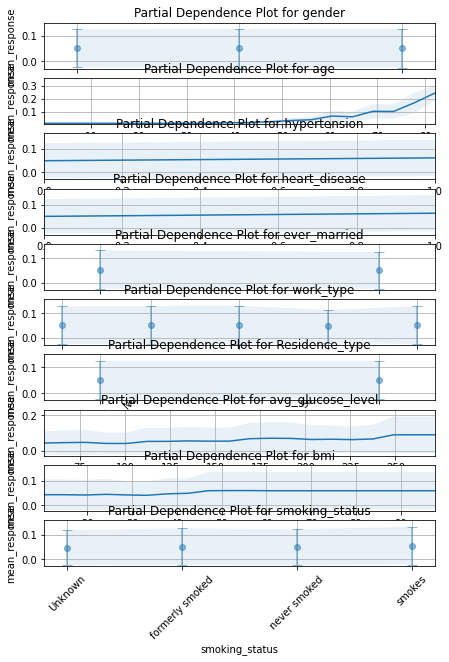

In [ ]:
best_model.partial_plot(df, cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])

Age has a big impact on stroke prediction according to partial plot

# Lets train our model again only on XGBoost

In [ ]:
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=123,include_algos = ["XGBoost"])

In [ ]:
aml2.train(x=X,y=y_category,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_lr_search_selection_AutoML_2_20220214_21441_select_grid_model_3


Model Summary: 


,,number_of_trees
0,,156.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03842499463538527
RMSE: 0.19602294415548724
LogLoss: 0.14026409084499294
Mean Per-Class Error: 0.3079570720027365
AUC: 0.8948096811839154
AUCPR: 0.37984672011852133
Gini: 0.7896193623678307

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21667388677597046: 


,,No,Yes,Error,Rate
0,No,3771.0,127.0,0.0326,(127.0/3898.0)
1,Yes,119.0,85.0,0.5833,(119.0/204.0)
2,Total,3890.0,212.0,0.06,(246.0/4102.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.216674,0.408654,99.0
1,max f2,0.145484,0.499600,164.0
2,max f0point5,0.283239,0.444444,53.0
3,max accuracy,0.309352,0.953437,41.0
4,max precision,0.586700,1.000000,0.0
5,max recall,0.009201,1.000000,382.0
6,max specificity,0.586700,1.000000,0.0
7,max absolute_mcc,0.169506,0.380964,143.0
8,max min_per_class_accuracy,0.070366,0.815803,252.0
9,max mean_per_class_accuracy,0.063459,0.825906,263.0



Gains/Lift Table: Avg response rate:  4.97 %, avg score:  5.11 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010239,0.334092,12.447712,12.447712,0.619048,0.452930,0.619048,0.452930,0.127451,0.127451,1144.771242,1144.771242,0.123346
1,2,0.020234,0.283209,10.789574,11.628632,0.536585,0.303940,0.578313,0.379332,0.107843,0.235294,978.957437,1062.863218,0.226315
2,3,0.030229,0.252188,5.394787,9.567441,0.268293,0.267421,0.475806,0.342329,0.053922,0.289216,439.478718,856.744149,0.272540
3,4,0.040224,0.232377,6.866093,8.896197,0.341463,0.241324,0.442424,0.317231,0.068627,0.357843,586.609278,789.619727,0.334241
4,5,0.050219,0.218451,4.413917,8.004093,0.219512,0.224926,0.398058,0.298860,0.044118,0.401961,341.391679,700.409290,0.370150
5,6,0.100195,0.151787,3.727308,5.870903,0.185366,0.183930,0.291971,0.241534,0.186275,0.588235,272.730751,487.090311,0.513582
6,7,0.150171,0.106059,2.059828,4.602607,0.102439,0.125507,0.228896,0.202921,0.102941,0.691176,105.982783,360.260695,0.569319
7,8,0.200146,0.076166,1.667480,3.869719,0.082927,0.089318,0.192448,0.174555,0.083333,0.774510,66.747967,286.971890,0.604423
8,9,0.300098,0.045575,1.078957,2.940221,0.053659,0.058791,0.146223,0.135998,0.107843,0.882353,7.895744,194.022077,0.612727
9,10,0.400049,0.028308,0.490435,2.328148,0.024390,0.036463,0.115783,0.111130,0.049020,0.931373,-50.956480,132.814759,0.559130




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.04231637621170824
RMSE: 0.20570944609256095
LogLoss: 0.157738736114587
Mean Per-Class Error: 0.27974879022927795
AUC: 0.8463943299228361
AUCPR: 0.21989845243303358
Gini: 0.6927886598456723

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1195178434252739: 


,,No,Yes,Error,Rate
0,No,3475.0,423.0,0.1085,(423.0/3898.0)
1,Yes,92.0,112.0,0.451,(92.0/204.0)
2,Total,3567.0,535.0,0.1255,(515.0/4102.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.119518,0.303112,187.0
1,max f2,0.102845,0.436726,208.0
2,max f0point5,0.368415,0.279412,25.0
3,max accuracy,0.384057,0.951243,23.0
4,max precision,0.560871,1.000000,0.0
5,max recall,0.009232,1.000000,385.0
6,max specificity,0.560871,1.000000,0.0
7,max absolute_mcc,0.102845,0.294796,208.0
8,max min_per_class_accuracy,0.055498,0.770395,274.0
9,max mean_per_class_accuracy,0.055013,0.773492,275.0



Gains/Lift Table: Avg response rate:  4.97 %, avg score:  5.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010239,0.336194,9.096405,9.096405,0.452381,0.433700,0.452381,0.433700,0.093137,0.093137,809.640523,809.640523,0.087237
1,2,0.020234,0.277726,2.942611,6.056579,0.146341,0.300099,0.301205,0.367705,0.029412,0.122549,194.261119,505.657926,0.107670
2,3,0.030229,0.251980,3.433046,5.189121,0.170732,0.265456,0.258065,0.333897,0.034314,0.156863,243.304639,418.912081,0.133261
3,4,0.040224,0.231307,3.923482,4.874629,0.195122,0.242061,0.242424,0.311077,0.039216,0.196078,292.348159,387.462864,0.164011
4,5,0.050219,0.218318,4.904352,4.880544,0.243902,0.224887,0.242718,0.293923,0.049020,0.245098,390.435198,388.054445,0.205078
5,6,0.100195,0.148555,3.825395,4.354253,0.190244,0.179118,0.216545,0.236660,0.191176,0.436275,282.539455,335.425314,0.353668
6,7,0.150171,0.106761,3.138785,3.949755,0.156098,0.125570,0.196429,0.199690,0.156863,0.593137,213.878527,294.975490,0.466149
7,8,0.200146,0.077353,1.471306,3.330897,0.073171,0.090280,0.165652,0.172371,0.073529,0.666667,47.130560,233.089728,0.490936
8,9,0.300098,0.046991,1.520349,2.727871,0.075610,0.059130,0.135662,0.134655,0.151961,0.818627,52.034912,172.787149,0.545667
9,10,0.400049,0.028985,0.637566,2.205614,0.031707,0.037509,0.109689,0.110383,0.063725,0.882353,-36.243424,120.561351,0.507545




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.891031,0.022650,0.904994,0.866017,0.870732,0.919512,0.893902
1,auc,0.846742,0.024172,0.857536,0.855894,0.806130,0.868781,0.845369
2,err,0.108969,0.022650,0.095006,0.133983,0.129268,0.080488,0.106098
3,err_count,89.400000,18.595700,78.000000,110.000000,106.000000,66.000000,87.000000
4,f0point5,0.265679,0.035634,0.270270,0.253283,0.230608,0.324232,0.250000
5,f1,0.321555,0.027921,0.315789,0.329268,0.293333,0.365385,0.304000
6,f2,0.411864,0.035921,0.379747,0.470383,0.402930,0.418502,0.387755
7,lift_top_group,8.071003,4.437512,11.124661,6.674797,2.222222,6.666666,13.666667
8,logloss,0.157740,0.007283,0.154591,0.155810,0.170588,0.152580,0.155131
9,max_per_class_error,0.485488,0.088177,0.560976,0.341463,0.463415,0.536585,0.525000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:16:16,15.164 sec,0.0,0.500000,0.693147,0.500000,0.049732,1.000000,0.950268
1,,2022-02-14 02:16:16,15.276 sec,15.0,0.242623,0.254987,0.776888,0.231111,9.830501,0.094100
2,,2022-02-14 02:16:16,15.470 sec,30.0,0.208930,0.182474,0.841961,0.274226,11.011438,0.078742
3,,2022-02-14 02:16:16,15.572 sec,45.0,0.203423,0.162920,0.858209,0.288631,11.968954,0.089712
4,,2022-02-14 02:16:16,15.675 sec,60.0,0.201494,0.155195,0.869951,0.306596,11.968954,0.098245
5,,2022-02-14 02:16:16,15.785 sec,75.0,0.200194,0.150817,0.876793,0.314671,12.447712,0.098245
6,,2022-02-14 02:16:17,15.909 sec,90.0,0.199190,0.147783,0.881597,0.329011,12.926471,0.093613
7,,2022-02-14 02:16:17,16.050 sec,105.0,0.198461,0.145669,0.884345,0.339507,12.447712,0.091663
8,,2022-02-14 02:16:17,16.202 sec,120.0,0.197780,0.143983,0.887025,0.350716,12.447712,0.090931
9,,2022-02-14 02:16:17,16.334 sec,135.0,0.197067,0.142272,0.890594,0.364006,12.926471,0.082399



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,647.087097,1.000000,0.492060
1,bmi,277.474426,0.428805,0.210998
2,avg_glucose_level,218.959564,0.338377,0.166502
3,hypertension,41.456127,0.064066,0.031524
4,heart_disease,34.973732,0.054048,0.026595
5,work_type.Self-employed,21.939732,0.033905,0.016683
6,smoking_status.never smoked,17.795195,0.027500,0.013532
7,work_type.Private,12.895655,0.019929,0.009806
8,ever_married.No,9.583354,0.014810,0.007287
9,smoking_status.smokes,9.213587,0.014239,0.007006


Accuracy is high on cross validated data but the recall and F1 is less.Next is we can tune hyperparameters and include regularization and test

### HYPERPARAMETERS TUNING 

In [ ]:
train_df, valid_df, test_df = df.split_frame(ratios=[0.6,0.2], seed=2018)

In [ ]:
#target = "y_category"
target='y_category'
train_df[target] = train_df[y_category]
valid_df[target] = valid_df[y_category]
test_df[target] = test_df[y_category]
print("Number of rows in train, valid and test set : ", train_df.shape[0], valid_df.shape[0], test_df.shape[0])

Number of rows in train, valid and test set :  3074 1031 1005


In [ ]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = [ 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
# initialize the H2O GBM 
gbm = H2OGradientBoostingEstimator()
# train with the initialized model
gbm.train(x=predictors, y=target, training_frame=train_df)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644804616987_9614


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15828.0,5.0,5.0,5.0,9.0,30.0,20.58




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.025060366173781032
RMSE: 0.15830466251434616
LogLoss: 0.09272312194353753
Mean Per-Class Error: 0.18863903973568127
AUC: 0.9717920159575403
AUCPR: 0.7942198538019446
Gini: 0.9435840319150806

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3285504320109395: 


,,No,Yes,Error,Rate
0,No,2902.0,16.0,0.0055,(16.0/2918.0)
1,Yes,58.0,98.0,0.3718,(58.0/156.0)
2,Total,2960.0,114.0,0.0241,(74.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.328550,0.725926,88.0
1,max f2,0.162751,0.733104,163.0
2,max f0point5,0.396063,0.820312,70.0
3,max accuracy,0.328550,0.975927,88.0
4,max precision,0.902504,1.000000,0.0
5,max recall,0.020945,1.000000,343.0
6,max specificity,0.902504,1.000000,0.0
7,max absolute_mcc,0.328550,0.723271,88.0
8,max min_per_class_accuracy,0.105564,0.903846,215.0
9,max mean_per_class_accuracy,0.105564,0.909771,215.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.573833,19.705128,19.705128,1.000000,0.678570,1.000000,0.678570,0.198718,0.198718,1870.512821,1870.512821,0.198718
1,2,0.020169,0.478839,18.433830,19.069479,0.935484,0.520997,0.967742,0.599783,0.185897,0.384615,1743.382961,1806.947891,0.383930
2,3,0.030254,0.377193,16.526882,18.221947,0.838710,0.428001,0.924731,0.542522,0.166667,0.551282,1552.688172,1722.194651,0.548883
3,4,0.040013,0.310367,9.852564,16.180634,0.500000,0.342508,0.821138,0.493738,0.096154,0.647436,885.256410,1518.063373,0.639896
4,5,0.050098,0.236281,6.356493,14.203047,0.322581,0.264405,0.720779,0.447574,0.064103,0.711538,535.649297,1320.304695,0.696802
5,6,0.100195,0.129063,3.198884,8.700966,0.162338,0.174627,0.441558,0.311100,0.160256,0.871795,219.888445,770.096570,0.812850
6,7,0.149967,0.083445,0.901542,6.112437,0.045752,0.104539,0.310195,0.242545,0.044872,0.916667,-9.845819,511.243673,0.807688
7,8,0.200065,0.058323,0.639777,4.742047,0.032468,0.070345,0.240650,0.199425,0.032051,0.948718,-36.022311,374.204711,0.788677
8,9,0.300260,0.035566,0.255911,3.245048,0.012987,0.045575,0.164680,0.148086,0.025641,0.974359,-74.408924,224.504820,0.710137
9,10,0.400130,0.023307,0.192558,2.483167,0.009772,0.028948,0.126016,0.118350,0.019231,0.993590,-80.744174,148.316656,0.625187




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 02:17:41,0.021 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252
1,,2022-02-14 02:17:41,0.053 sec,1.0,0.214079,0.182795,0.895477,0.342003,11.183992,0.078725
2,,2022-02-14 02:17:41,0.069 sec,2.0,0.210511,0.173609,0.902657,0.353728,11.823077,0.071568
3,,2022-02-14 02:17:41,0.103 sec,3.0,0.207100,0.165813,0.907141,0.402426,11.716563,0.064411
4,,2022-02-14 02:17:41,0.127 sec,4.0,0.203766,0.158599,0.918447,0.433437,13.348635,0.055953
5,,2022-02-14 02:17:41,0.154 sec,5.0,0.201319,0.153628,0.921962,0.452180,13.984285,0.057580
6,,2022-02-14 02:17:41,0.175 sec,6.0,0.198973,0.149158,0.923516,0.462801,13.547276,0.049447
7,,2022-02-14 02:17:41,0.190 sec,7.0,0.197232,0.145685,0.926245,0.468489,13.984285,0.050748
8,,2022-02-14 02:17:41,0.201 sec,8.0,0.195745,0.142801,0.926671,0.473559,13.984285,0.050098
9,,2022-02-14 02:17:41,0.212 sec,9.0,0.194379,0.140147,0.929029,0.486903,13.984285,0.045543



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,103.068665,1.000000,0.391666
1,avg_glucose_level,57.656166,0.559396,0.219096
2,bmi,44.349041,0.430286,0.168528
3,smoking_status,20.528624,0.199174,0.078010
4,work_type,12.709065,0.123307,0.048295
5,hypertension,6.931976,0.067256,0.026342
6,ever_married,4.651108,0.045126,0.017674
7,heart_disease,4.641518,0.045033,0.017638
8,gender,4.531886,0.043970,0.017221
9,Residence_type,4.086537,0.039649,0.015529


In [ ]:
gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15828.0,5.0,5.0,5.0,9.0,30.0,20.58


In [ ]:
print(gbm.model_performance(test_df))


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.04229465189063547
RMSE: 0.2056566359022618
LogLoss: 0.16339245176917117
Mean Per-Class Error: 0.2964994775339603
AUC: 0.8170280390107977
AUCPR: 0.22217581388584498
Gini: 0.6340560780215954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11234785140533009: 


,,No,Yes,Error,Rate
0,No,868.0,89.0,0.093,(89.0/957.0)
1,Yes,24.0,24.0,0.5,(24.0/48.0)
2,Total,892.0,113.0,0.1124,(113.0/1005.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.112348,0.298137,108.0
1,max f2,0.085064,0.408163,139.0
2,max f0point5,0.449205,0.340909,9.0
3,max accuracy,0.449205,0.954229,9.0
4,max precision,0.795628,1.000000,0.0
5,max recall,0.003859,1.000000,380.0
6,max specificity,0.795628,1.000000,0.0
7,max absolute_mcc,0.112348,0.274758,108.0
8,max min_per_class_accuracy,0.038997,0.729167,228.0
9,max mean_per_class_accuracy,0.038997,0.736579,228.0



Gains/Lift Table: Avg response rate:  4.78 %, avg score:  4.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010945,0.448406,11.420455,11.420455,0.545455,0.591446,0.545455,0.591446,0.125000,0.125000,1042.045455,1042.045455,0.119775
1,2,0.020896,0.378286,2.093750,6.979167,0.100000,0.412421,0.333333,0.506196,0.020833,0.145833,109.375000,597.916667,0.131204
2,3,0.030846,0.317414,4.187500,6.078629,0.200000,0.346342,0.290323,0.454630,0.041667,0.187500,318.750000,507.862903,0.164511
3,4,0.040796,0.263349,0.000000,4.596037,0.000000,0.290436,0.219512,0.414583,0.000000,0.187500,-100.000000,359.603659,0.154062
4,5,0.050746,0.216189,8.375000,5.337010,0.400000,0.232585,0.254902,0.378897,0.083333,0.270833,737.500000,433.700980,0.231126
5,6,0.100498,0.126848,2.931250,4.146040,0.140000,0.163581,0.198020,0.272305,0.145833,0.416667,193.125000,314.603960,0.332027
6,7,0.150249,0.084506,3.350000,3.882450,0.160000,0.101235,0.185430,0.215659,0.166667,0.583333,235.000000,288.245033,0.454807
7,8,0.200000,0.060001,0.837500,3.125000,0.040000,0.071465,0.149254,0.179790,0.041667,0.625000,-16.250000,212.500000,0.446317
8,9,0.300498,0.036060,1.036510,2.426531,0.049505,0.045983,0.115894,0.135040,0.104167,0.729167,3.650990,142.653146,0.450170
9,10,0.400000,0.022962,0.628125,1.979167,0.030000,0.028807,0.094527,0.108614,0.062500,0.791667,-37.187500,97.916667,0.411311


AUC is high on train data , but is is low on test data. Moreover, our model is struggling to predict the positive intance of stroke as recall is less

# Playing with more Hyperparameters

In [ ]:
tuned_gbm  = H2OGradientBoostingEstimator(
    ntrees = 2000,
    learn_rate = 0.02,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1234
)      
tuned_gbm.train(x=predictors, y=target, training_frame=train_df, validation_frame=valid_df)

gbm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644804616987_9667


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,62.0,62.0,21101.0,5.0,5.0,5.0,13.0,29.0,22.596775




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03650972600054699
RMSE: 0.19107518415677896
LogLoss: 0.1332867528850113
Mean Per-Class Error: 0.24677510061334598
AUC: 0.9372945993919264
AUCPR: 0.5497601213445517
Gini: 0.8745891987838528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19964624201098477: 


,,No,Yes,Error,Rate
0,No,2862.0,56.0,0.0192,(56.0/2918.0)
1,Yes,74.0,82.0,0.4744,(74.0/156.0)
2,Total,2936.0,138.0,0.0423,(130.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.199646,0.557823,92.0
1,max f2,0.114010,0.605901,172.0
2,max f0point5,0.206428,0.586890,86.0
3,max accuracy,0.252277,0.959336,54.0
4,max precision,0.491983,1.000000,0.0
5,max recall,0.023136,1.000000,363.0
6,max specificity,0.491983,1.000000,0.0
7,max absolute_mcc,0.199646,0.536814,92.0
8,max min_per_class_accuracy,0.075990,0.852564,229.0
9,max mean_per_class_accuracy,0.066388,0.866470,247.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.326321,16.526882,16.526882,0.838710,0.386618,0.838710,0.386618,0.166667,0.166667,1552.688172,1552.688172,0.164953
1,2,0.020169,0.258967,12.077337,14.302109,0.612903,0.290689,0.725806,0.338654,0.121795,0.288462,1107.733664,1330.210918,0.282636
2,3,0.030254,0.229379,9.534739,12.712986,0.483871,0.242574,0.645161,0.306627,0.096154,0.384615,853.473945,1171.298594,0.373306
3,4,0.040013,0.207331,10.509402,12.175526,0.533333,0.218425,0.617886,0.285114,0.102564,0.487179,950.940171,1117.552637,0.471073
4,5,0.050098,0.188809,5.085194,10.748252,0.258065,0.198145,0.545455,0.267608,0.051282,0.538462,408.519438,974.825175,0.514473
5,6,0.100195,0.120643,3.582751,7.165501,0.181818,0.151824,0.363636,0.209716,0.179487,0.717949,258.275058,616.550117,0.650779
6,7,0.149967,0.083539,1.674292,5.343039,0.084967,0.099949,0.271150,0.173286,0.083333,0.801282,67.429194,434.303910,0.686135
7,8,0.200065,0.066729,1.791375,4.453679,0.090909,0.074836,0.226016,0.148633,0.089744,0.891026,79.137529,345.367938,0.727900
8,9,0.299935,0.044307,0.577675,3.163079,0.029316,0.054233,0.160521,0.117201,0.057692,0.948718,-42.232523,216.307915,0.683468
9,10,0.400130,0.032332,0.319888,2.451126,0.016234,0.037374,0.124390,0.097211,0.032051,0.980769,-68.011156,145.112570,0.611681




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0381190482533507
RMSE: 0.19524100044137938
LogLoss: 0.14882797809348847
Mean Per-Class Error: 0.3379873788595898
AUC: 0.8391142663962137
AUCPR: 0.20584278710309598
Gini: 0.6782285327924273

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1562802074941645: 


,,No,Yes,Error,Rate
0,No,933.0,53.0,0.0538,(53.0/986.0)
1,Yes,28.0,17.0,0.6222,(28.0/45.0)
2,Total,961.0,70.0,0.0786,(81.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.156280,0.295652,67.0
1,max f2,0.066964,0.422886,181.0
2,max f0point5,0.156280,0.261538,67.0
3,max accuracy,0.388775,0.957323,0.0
4,max precision,0.388775,1.000000,0.0
5,max recall,0.017391,1.000000,386.0
6,max specificity,0.388775,1.000000,0.0
7,max absolute_mcc,0.066964,0.280773,181.0
8,max min_per_class_accuracy,0.062024,0.777778,196.0
9,max mean_per_class_accuracy,0.066964,0.782443,181.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.288750,8.331313,8.331313,0.363636,0.333794,0.363636,0.333794,0.088889,0.088889,733.131313,733.131313,0.081789
1,2,0.020369,0.234352,2.291111,5.455026,0.100000,0.256540,0.238095,0.297006,0.022222,0.111111,129.111111,445.502646,0.094884
2,3,0.030068,0.202545,4.582222,5.173477,0.200000,0.215273,0.225806,0.270641,0.044444,0.155556,358.222222,417.347670,0.131215
3,4,0.040737,0.191942,6.248485,5.455026,0.272727,0.195769,0.238095,0.251032,0.066667,0.222222,524.848485,445.502646,0.189768
4,5,0.050436,0.181133,2.291111,4.846581,0.100000,0.185206,0.211538,0.238373,0.022222,0.244444,129.111111,384.658120,0.202862
5,6,0.100873,0.122815,3.965385,4.405983,0.173077,0.146262,0.192308,0.192317,0.200000,0.444444,296.538462,340.598291,0.359252
6,7,0.150339,0.088466,2.246187,3.695341,0.098039,0.102903,0.161290,0.162897,0.111111,0.555556,124.618736,269.534050,0.423710
7,8,0.200776,0.069383,2.643590,3.431133,0.115385,0.078672,0.149758,0.141739,0.133333,0.688889,164.358974,243.113258,0.510390
8,9,0.300679,0.048745,1.112190,2.660645,0.048544,0.058951,0.116129,0.114232,0.111111,0.800000,11.218986,166.064516,0.522110
9,10,0.400582,0.034815,0.889752,2.218994,0.038835,0.040813,0.096852,0.095922,0.088889,0.888889,-11.024811,121.899381,0.510593




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 02:17:43,0.005 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 02:17:43,0.030 sec,1.0,0.218779,0.197648,0.875437,0.249113,6.390852,0.100520,0.204012,0.178184,0.797487,0.133439,4.295833,0.097963
2,,2022-02-14 02:17:44,0.050 sec,2.0,0.217968,0.194353,0.897692,0.292823,8.263441,0.108003,0.203479,0.176093,0.819146,0.149161,1.909259,0.101843
3,,2022-02-14 02:17:44,0.074 sec,3.0,0.217282,0.191778,0.901856,0.318154,8.867308,0.087833,0.203017,0.174423,0.829536,0.174719,4.165657,0.102813
4,,2022-02-14 02:17:44,0.109 sec,4.0,0.216569,0.189235,0.906658,0.349993,10.806038,0.087833,0.202716,0.173332,0.828499,0.167700,6.248485,0.094083
5,,2022-02-14 02:17:44,0.136 sec,5.0,0.215826,0.186631,0.913336,0.379999,12.077337,0.074496,0.202403,0.172172,0.833390,0.166751,2.082828,0.104753
6,,2022-02-14 02:17:44,0.162 sec,6.0,0.215016,0.184031,0.913753,0.402035,12.712986,0.076773,0.202059,0.170947,0.831744,0.159783,2.082828,0.096023
7,,2022-02-14 02:17:44,0.190 sec,7.0,0.214406,0.182104,0.913750,0.403845,14.619934,0.074170,0.201714,0.169794,0.830911,0.161265,0.000000,0.095053
8,,2022-02-14 02:17:44,0.220 sec,8.0,0.213730,0.180093,0.915652,0.415423,14.619934,0.072869,0.201408,0.168847,0.826820,0.162809,2.082828,0.082444
9,,2022-02-14 02:17:44,0.250 sec,9.0,0.213124,0.178322,0.917529,0.415653,13.348635,0.068640,0.201072,0.167833,0.825907,0.164233,2.082828,0.075655



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,315.759033,1.000000,0.446890
1,avg_glucose_level,143.798981,0.455407,0.203517
2,bmi,109.598557,0.347096,0.155113
3,smoking_status,48.870167,0.154770,0.069165
4,work_type,25.091757,0.079465,0.035512
5,heart_disease,21.789858,0.069008,0.030839
6,hypertension,18.292881,0.057933,0.025890
7,Residence_type,12.311567,0.038990,0.017424
8,gender,5.865347,0.018575,0.008301
9,ever_married,5.192275,0.016444,0.007349


Age and glucose level are most important parameters

In [ ]:
tuned_gbm.model_performance(valid_df).auc()


0.8391142663962137

AUC score on validation data is 0.83 which is acceptable. However the F1 and recall is not great

In [ ]:
#Grid Search
from h2o.grid.grid_search import H2OGridSearch

grid_search_gbm = H2OGradientBoostingEstimator(
    #nfolds=5,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1344,
    #keep_cross_validation_predictions = True
) 

hyper_params = {
    'learn_rate':[0.01, 0.02, 0.03],
    'max_depth':[4,8,16,24],
    'ntrees':[50, 250, 1000]}

grid = H2OGridSearch(grid_search_gbm, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=target,
           training_frame=train_df,
           validation_frame=valid_df)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      learn_rate  max_depth  ntrees            model_ids   logloss
0           0.02        4.0   250.0  depth_grid_model_14  0.147822
1           0.02        4.0  1000.0  depth_grid_model_26  0.147822
2           0.02       16.0   250.0  depth_grid_model_20  0.149064
3           0.02       16.0  1000.0  depth_grid_model_32  0.149064
4           0.02        8.0   250.0  depth_grid_model_17  0.149236
5           0.02        8.0  1000.0  depth_grid_model_29  0.149236
6           0.03       24.0   250.0  depth_grid_model_24  0.149406
7           0.03       24.0  1000.0  depth_grid_model_36  0.149406
8           0.03        8.0   250.0  depth_grid_model_18  0.149763
9           0.03        8.0  1000.0  depth_grid_model_30  0.149763
10          0.01       24.0   250.0  depth_grid_model_22  0.149911
11          0.03        4.0   250.0  depth_grid_model_15  0.150301
12          0.03        4.0  1000.

In [ ]:
grid_sorted = grid.get_grid(sort_by='auc',decreasing=True)

In [ ]:
print(grid_sorted)

      learn_rate  max_depth  ntrees            model_ids       auc
0           0.02        4.0   250.0  depth_grid_model_14  0.839689
1           0.02        4.0  1000.0  depth_grid_model_26  0.839689
2           0.02        4.0    50.0   depth_grid_model_2  0.836691
3           0.03        8.0   250.0  depth_grid_model_18  0.834731
4           0.03        8.0  1000.0  depth_grid_model_30  0.834731
5           0.01        4.0   250.0  depth_grid_model_13  0.833176
6           0.01        4.0  1000.0  depth_grid_model_25  0.833176
7           0.01        8.0   250.0  depth_grid_model_16  0.833108
8           0.01        8.0  1000.0  depth_grid_model_28  0.833108
9           0.01        4.0    50.0   depth_grid_model_1  0.832285
10          0.03        4.0    50.0   depth_grid_model_3  0.831959
11          0.03        4.0   250.0  depth_grid_model_15  0.831913
12          0.03        4.0  1000.0  depth_grid_model_27  0.831913
13          0.02        8.0   250.0  depth_grid_model_17  0.83

In [ ]:
best_gbm = grid_sorted.models[0]

In [ ]:
print(best_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  depth_grid_model_14


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,103.0,103.0,23147.0,4.0,4.0,4.0,7.0,16.0,13.368932




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.036752680227868796
RMSE: 0.19170988557679752
LogLoss: 0.13283258477907858
Mean Per-Class Error: 0.2650788211103495
AUC: 0.9228671288729549
AUCPR: 0.4907941682150147
Gini: 0.8457342577459097

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20821612127479028: 


,,No,Yes,Error,Rate
0,No,2830.0,88.0,0.0302,(88.0/2918.0)
1,Yes,78.0,78.0,0.5,(78.0/156.0)
2,Total,2908.0,166.0,0.054,(166.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.208216,0.484472,107.0
1,max f2,0.114875,0.574597,188.0
2,max f0point5,0.303056,0.544554,48.0
3,max accuracy,0.310561,0.957710,47.0
4,max precision,0.548222,1.000000,0.0
5,max recall,0.020003,1.000000,355.0
6,max specificity,0.548222,1.000000,0.0
7,max absolute_mcc,0.208216,0.456253,107.0
8,max min_per_class_accuracy,0.068499,0.826923,251.0
9,max mean_per_class_accuracy,0.060666,0.847208,264.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.05 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.358547,15.891232,15.891232,0.806452,0.430632,0.806452,0.430632,0.160256,0.160256,1489.123242,1489.123242,0.158200
1,2,0.020169,0.302698,12.077337,13.984285,0.612903,0.331211,0.709677,0.380922,0.121795,0.282051,1107.733664,1298.428453,0.275883
2,3,0.030254,0.264882,5.720844,11.229804,0.290323,0.282297,0.569892,0.348047,0.057692,0.339744,472.084367,1022.980425,0.326036
3,4,0.040013,0.232957,7.882051,10.413279,0.400000,0.249534,0.528455,0.324019,0.076923,0.416667,688.205128,941.327913,0.396790
4,5,0.050098,0.212787,5.085194,9.340743,0.258065,0.222009,0.474026,0.303485,0.051282,0.467949,408.519438,834.074259,0.440190
5,6,0.100195,0.132254,4.350483,6.845613,0.220779,0.171892,0.347403,0.237688,0.217949,0.685897,335.048285,584.561272,0.617015
6,7,0.149967,0.092211,1.287917,5.001085,0.065359,0.110575,0.253796,0.195501,0.064103,0.750000,28.791688,400.108460,0.632111
7,8,0.200065,0.069564,1.407509,4.101230,0.071429,0.079346,0.208130,0.166415,0.070513,0.820513,40.750916,310.122994,0.653618
8,9,0.299935,0.043049,1.091163,3.098963,0.055375,0.054435,0.157267,0.129129,0.108974,0.929487,9.116345,209.896268,0.663209
9,10,0.400130,0.031657,0.383866,2.419085,0.019481,0.036275,0.122764,0.105878,0.038462,0.967949,-61.613387,141.908484,0.598175




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.03853465224436467
RMSE: 0.19630245093825158
LogLoss: 0.1478224173331134
Mean Per-Class Error: 0.2916046878521523
AUC: 0.8396889790398918
AUCPR: 0.17365924083984197
Gini: 0.6793779580797836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12336005783482125: 


,,No,Yes,Error,Rate
0,No,893.0,93.0,0.0943,(93.0/986.0)
1,Yes,22.0,23.0,0.4889,(22.0/45.0)
2,Total,915.0,116.0,0.1115,(115.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.123360,0.285714,105.0
1,max f2,0.072542,0.411311,176.0
2,max f0point5,0.205157,0.245614,55.0
3,max accuracy,0.466839,0.955383,0.0
4,max precision,0.406100,0.400000,4.0
5,max recall,0.011338,1.000000,376.0
6,max specificity,0.466839,0.998986,0.0
7,max absolute_mcc,0.072542,0.270159,176.0
8,max min_per_class_accuracy,0.053589,0.766734,211.0
9,max mean_per_class_accuracy,0.046338,0.797431,230.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.325095,6.248485,6.248485,0.272727,0.384397,0.272727,0.384397,0.066667,0.066667,524.848485,524.848485,0.058553
1,2,0.020369,0.265568,2.291111,4.364021,0.100000,0.292734,0.190476,0.340748,0.022222,0.088889,129.111111,336.402116,0.071648
2,3,0.030068,0.252810,6.873333,5.173477,0.300000,0.260978,0.225806,0.315016,0.066667,0.155556,587.333333,417.347670,0.131215
3,4,0.040737,0.234869,4.165657,4.909524,0.181818,0.243371,0.214286,0.296252,0.044444,0.200000,316.565657,390.952381,0.166531
4,5,0.050436,0.219275,6.873333,5.287179,0.300000,0.226157,0.230769,0.282772,0.066667,0.266667,587.333333,428.717949,0.226099
5,6,0.100873,0.135703,3.524786,4.405983,0.153846,0.168208,0.192308,0.225490,0.177778,0.444444,252.478632,340.598291,0.359252
6,7,0.150339,0.091248,2.695425,3.843154,0.117647,0.111651,0.167742,0.188033,0.133333,0.577778,169.542484,284.315412,0.446946
7,8,0.200776,0.072567,2.643590,3.541814,0.115385,0.080828,0.154589,0.161102,0.133333,0.711111,164.358974,254.181428,0.533626
8,9,0.300679,0.046031,1.557066,2.882366,0.067961,0.057422,0.125806,0.126653,0.155556,0.866667,55.706580,188.236559,0.591819
9,10,0.400582,0.034328,0.222438,2.218994,0.009709,0.039308,0.096852,0.104870,0.022222,0.888889,-77.756203,121.899381,0.510593




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 02:18:06,19.620 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 02:18:06,19.639 sec,1.0,0.218929,0.198286,0.846776,0.209466,5.630037,0.107677,0.204067,0.178405,0.803944,0.119217,2.291111,0.151309
2,,2022-02-14 02:18:06,19.656 sec,2.0,0.218267,0.195562,0.867701,0.254301,7.389423,0.083279,0.203705,0.176971,0.807832,0.131614,2.749333,0.110572
3,,2022-02-14 02:18:06,19.675 sec,3.0,0.217661,0.193198,0.876867,0.287140,8.899090,0.078399,0.203348,0.175585,0.818481,0.138670,1.909259,0.137730
4,,2022-02-14 02:18:06,19.696 sec,4.0,0.217089,0.191077,0.884484,0.299285,8.359751,0.079050,0.203064,0.174504,0.819259,0.138617,2.082828,0.119302
5,,2022-02-14 02:18:06,19.711 sec,5.0,0.216379,0.188650,0.887362,0.319838,9.852564,0.072869,0.202813,0.173562,0.810773,0.133469,0.000000,0.111542
6,,2022-02-14 02:18:06,19.723 sec,6.0,0.215764,0.186582,0.889723,0.326782,10.806038,0.067990,0.202402,0.172130,0.812970,0.137052,2.082828,0.111542
7,,2022-02-14 02:18:06,19.736 sec,7.0,0.215236,0.184829,0.893066,0.329441,10.748252,0.070592,0.202099,0.171033,0.829930,0.139059,2.082828,0.109602
8,,2022-02-14 02:18:06,19.751 sec,8.0,0.214768,0.183324,0.893247,0.328710,10.947293,0.069616,0.201865,0.170173,0.831643,0.139070,1.909259,0.109602
9,,2022-02-14 02:18:06,19.765 sec,9.0,0.214275,0.181812,0.893036,0.326133,8.899090,0.071568,0.201604,0.169279,0.832680,0.140374,1.909259,0.110572



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,328.641144,1.000000,0.469949
1,avg_glucose_level,135.377136,0.411930,0.193586
2,bmi,109.166565,0.332176,0.156106
3,smoking_status,39.249027,0.119428,0.056125
4,heart_disease,24.677601,0.075090,0.035288
5,work_type,24.390728,0.074217,0.034878
6,hypertension,18.155127,0.055243,0.025961
7,ever_married,9.854744,0.029986,0.014092
8,gender,5.897970,0.017947,0.008434
9,Residence_type,3.902487,0.011875,0.005580


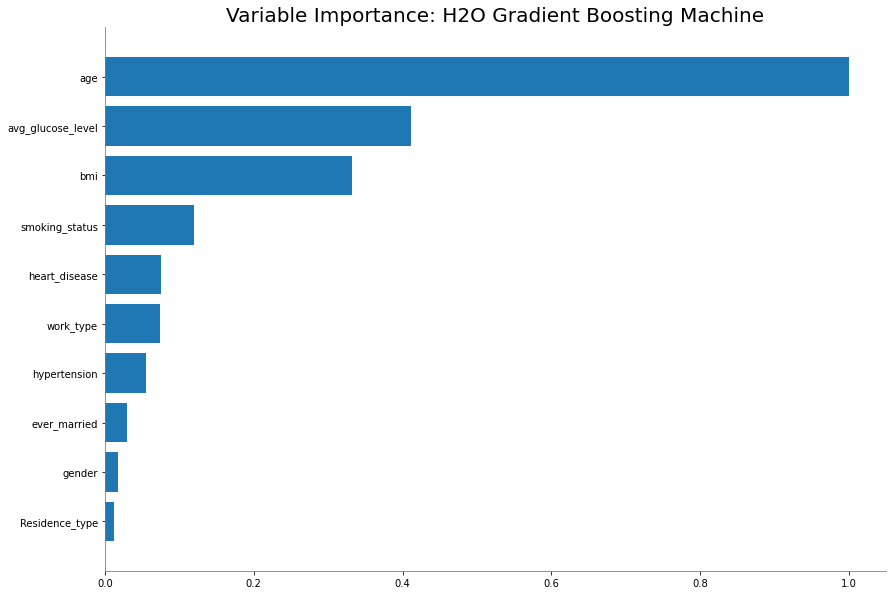

<Figure size 432x288 with 0 Axes>

In [ ]:

best_gbm.varimp_plot()

In [ ]:
from sklearn.metrics import roc_auc_score
pred_val = (best_gbm.predict(test_df[predictors])).as_data_frame()
true_val = (test_df[target]).as_data_frame()
print(pred_val)
print(true_val)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
     predict        No       Yes
0        Yes  0.855678  0.144322
1         No  0.917675  0.082325
2        Yes  0.842323  0.157677
3        Yes  0.755176  0.244824
4         No  0.899433  0.100567
...      ...       ...       ...
1000      No  0.961030  0.038970
1001      No  0.939930  0.060070
1002      No  0.959695  0.040305
1003      No  0.991107  0.008893
1004     Yes  0.531748  0.468252

[1005 rows x 3 columns]
     y_category
0           Yes
1           Yes
2           Yes
3           Yes
4           Yes
...         ...
1000         No
1001         No
1002         No
1003         No
1004         No

[1005 rows x 1 columns]


In [ ]:
best_gbm.auc()


0.9228671288729549

We can see the auc is high. Prediction with Yes still performs poor

## Testing on more parameters

In [ ]:
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=predictors, y=target,
                training_frame=train_df,
                validation_frame=valid_df,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
#gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]
best_gbm2



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid2_model_12


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,31141.0,5.0,5.0,5.0,11.0,28.0,20.23




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.031227127464562677
RMSE: 0.17671199015506187
LogLoss: 0.11049679094407233
Mean Per-Class Error: 0.21690084532785014
AUC: 0.9577423946855064
AUCPR: 0.6478145195396307
Gini: 0.9154847893710127

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2519241550491449: 


,,No,Yes,Error,Rate
0,No,2868.0,50.0,0.0171,(50.0/2918.0)
1,Yes,65.0,91.0,0.4167,(65.0/156.0)
2,Total,2933.0,141.0,0.0374,(115.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.251924,0.612795,102.0
1,max f2,0.134179,0.657203,184.0
2,max f0point5,0.314939,0.678295,71.0
3,max accuracy,0.314939,0.965517,71.0
4,max precision,0.726326,1.000000,0.0
5,max recall,0.020836,1.000000,348.0
6,max specificity,0.726326,1.000000,0.0
7,max absolute_mcc,0.272173,0.597761,93.0
8,max min_per_class_accuracy,0.094265,0.891021,223.0
9,max mean_per_class_accuracy,0.091871,0.895206,227.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.450057,18.433830,18.433830,0.935484,0.553585,0.935484,0.553585,0.185897,0.185897,1743.382961,1743.382961,0.185212
1,2,0.020169,0.372127,14.619934,16.526882,0.741935,0.410640,0.838710,0.482113,0.147436,0.333333,1361.993383,1552.688172,0.329906
2,3,0.030254,0.309097,11.441687,14.831817,0.580645,0.342161,0.752688,0.435462,0.115385,0.448718,1044.168734,1383.181693,0.440836
3,4,0.040013,0.272686,9.195726,13.457161,0.466667,0.291710,0.682927,0.400401,0.089744,0.538462,819.572650,1245.716073,0.525096
4,5,0.050098,0.240669,6.356493,12.027806,0.322581,0.254989,0.610390,0.371129,0.064103,0.602564,535.649297,1102.780553,0.582002
5,6,0.100195,0.139412,3.454795,7.741300,0.175325,0.183107,0.392857,0.277118,0.173077,0.775641,245.479520,674.130037,0.711556
6,7,0.149967,0.092757,2.447042,5.984204,0.124183,0.115154,0.303688,0.223365,0.121795,0.897436,144.704206,498.420379,0.787429
7,8,0.200065,0.066472,0.639777,4.645925,0.032468,0.079657,0.235772,0.187379,0.032051,0.929487,-36.022311,364.592454,0.768418
8,9,0.299935,0.037719,0.513489,3.269940,0.026059,0.049746,0.165944,0.141551,0.051282,0.980769,-48.651132,226.993993,0.717233
9,10,0.400130,0.025344,0.127955,2.483167,0.006494,0.030854,0.126016,0.113832,0.012821,0.993590,-87.204462,148.316656,0.625187




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.039543172879182
RMSE: 0.19885465264655489
LogLoss: 0.1486409745035424
Mean Per-Class Error: 0.30114942528735633
AUC: 0.8381226053639848
AUCPR: 0.1709226118279146
Gini: 0.6762452107279695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1616992566764009: 


,,No,Yes,Error,Rate
0,No,918.0,68.0,0.069,(68.0/986.0)
1,Yes,24.0,21.0,0.5333,(24.0/45.0)
2,Total,942.0,89.0,0.0892,(92.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.161699,0.313433,81.0
1,max f2,0.092036,0.416667,149.0
2,max f0point5,0.196728,0.276923,65.0
3,max accuracy,0.598294,0.955383,0.0
4,max precision,0.388442,0.333333,11.0
5,max recall,0.004372,1.000000,393.0
6,max specificity,0.598294,0.998986,0.0
7,max absolute_mcc,0.161699,0.289322,81.0
8,max min_per_class_accuracy,0.057217,0.768763,211.0
9,max mean_per_class_accuracy,0.042466,0.797938,242.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.398260,6.248485,6.248485,0.272727,0.500706,0.272727,0.500706,0.066667,0.066667,524.848485,524.848485,0.058553
1,2,0.020369,0.335840,4.582222,5.455026,0.200000,0.364397,0.238095,0.435797,0.044444,0.111111,358.222222,445.502646,0.094884
2,3,0.030068,0.286851,2.291111,4.434409,0.100000,0.314282,0.193548,0.396598,0.022222,0.133333,129.111111,343.440860,0.107978
3,4,0.040737,0.265864,4.165657,4.364021,0.181818,0.274346,0.190476,0.364580,0.044444,0.177778,316.565657,336.402116,0.143295
4,5,0.050436,0.236519,4.582222,4.405983,0.200000,0.251615,0.192308,0.342856,0.044444,0.222222,358.222222,340.598291,0.179626
5,6,0.100873,0.141618,4.846581,4.626282,0.211538,0.183632,0.201923,0.263244,0.244444,0.466667,384.658120,362.628205,0.382488
6,7,0.150339,0.097396,1.796950,3.695341,0.078431,0.116012,0.161290,0.214800,0.088889,0.555556,79.694989,269.534050,0.423710
7,8,0.200776,0.071582,2.202991,3.320451,0.096154,0.084321,0.144928,0.182023,0.111111,0.666667,120.299145,232.045089,0.487153
8,9,0.300679,0.041364,2.001942,2.882366,0.087379,0.056608,0.125806,0.140353,0.200000,0.866667,100.194175,188.236559,0.591819
9,10,0.400582,0.027781,0.222438,2.218994,0.009709,0.033271,0.096852,0.113647,0.022222,0.888889,-77.756203,121.899381,0.510593




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 02:20:42,28.273 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 02:20:42,28.287 sec,1.0,0.218112,0.195154,0.829169,0.247719,7.778340,0.071893,0.203685,0.177025,0.750248,0.130597,4.165657,0.125121
2,,2022-02-14 02:20:42,28.298 sec,2.0,0.216982,0.190903,0.887556,0.307867,9.852564,0.083930,0.203147,0.174957,0.792270,0.136761,3.524786,0.147430
3,,2022-02-14 02:20:42,28.312 sec,3.0,0.215872,0.187102,0.901659,0.337665,11.011689,0.082954,0.202634,0.173191,0.791864,0.140206,4.909524,0.078565
4,,2022-02-14 02:20:42,28.326 sec,4.0,0.215003,0.184283,0.907223,0.349116,9.534739,0.061158,0.202212,0.171626,0.817050,0.145210,2.082828,0.084384
5,,2022-02-14 02:20:42,28.341 sec,5.0,0.214105,0.181625,0.907276,0.358276,11.084135,0.058881,0.201873,0.170416,0.821648,0.145568,4.165657,0.121242
6,,2022-02-14 02:20:42,28.360 sec,6.0,0.213106,0.178788,0.908871,0.362028,10.170389,0.055953,0.201544,0.169168,0.827868,0.149110,4.165657,0.132881
7,,2022-02-14 02:20:42,28.377 sec,7.0,0.212186,0.176149,0.913971,0.369448,9.534739,0.069941,0.201048,0.167426,0.834900,0.154146,4.165657,0.113482
8,,2022-02-14 02:20:42,28.393 sec,8.0,0.211291,0.173771,0.915830,0.373813,9.534739,0.073195,0.200521,0.165805,0.835970,0.161690,4.165657,0.110572
9,,2022-02-14 02:20:42,28.410 sec,9.0,0.210280,0.171235,0.915858,0.378378,9.534739,0.052375,0.199958,0.164069,0.837255,0.164759,4.165657,0.101843



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,283.062439,1.000000,0.398798
1,avg_glucose_level,169.966583,0.600456,0.239460
2,bmi,111.492538,0.393880,0.157078
3,smoking_status,63.823544,0.225475,0.089919
4,work_type,23.845493,0.084241,0.033595
5,hypertension,16.721172,0.059072,0.023558
6,Residence_type,15.697096,0.055455,0.022115
7,heart_disease,12.366148,0.043687,0.017422
8,gender,9.029087,0.031898,0.012721
9,ever_married,3.785585,0.013374,0.005333


Changing the parameters is not improving much. Hyperparameters has improved accuracy but not recall and F1

In [ ]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test_df)
best_gbm_perf2



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.041932903584130696
RMSE: 0.20477525139559882
LogLoss: 0.1601693723703132
Mean Per-Class Error: 0.2782458202716823
AUC: 0.8223615464994776
AUCPR: 0.22892953090852894
Gini: 0.6447230929989551

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14122989624050167: 


,,No,Yes,Error,Rate
0,No,883.0,74.0,0.0773,(74.0/957.0)
1,Yes,23.0,25.0,0.4792,(23.0/48.0)
2,Total,906.0,99.0,0.0965,(97.0/1005.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.141230,0.340136,95.0
1,max f2,0.141230,0.429553,95.0
2,max f0point5,0.141230,0.281532,95.0
3,max accuracy,0.581882,0.955224,2.0
4,max precision,0.719831,1.000000,0.0
5,max recall,0.004844,1.000000,380.0
6,max specificity,0.719831,1.000000,0.0
7,max absolute_mcc,0.141230,0.317393,95.0
8,max min_per_class_accuracy,0.041670,0.750000,220.0
9,max mean_per_class_accuracy,0.049905,0.761135,200.0



Gains/Lift Table: Avg response rate:  4.78 %, avg score:  4.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010945,0.421425,5.710227,5.710227,0.272727,0.534445,0.272727,0.534445,0.062500,0.062500,471.022727,471.022727,0.054141
1,2,0.020896,0.339739,6.281250,5.982143,0.300000,0.367381,0.285714,0.454891,0.062500,0.125000,528.125000,498.214286,0.109326
2,3,0.030846,0.296695,2.093750,4.727823,0.100000,0.312484,0.225806,0.408953,0.020833,0.145833,109.375000,372.782258,0.120755
3,4,0.040796,0.248598,4.187500,4.596037,0.200000,0.271319,0.219512,0.375384,0.041667,0.187500,318.750000,359.603659,0.154062
4,5,0.050746,0.208046,4.187500,4.515931,0.200000,0.226509,0.215686,0.346192,0.041667,0.229167,318.750000,351.593137,0.187369
5,6,0.100498,0.137489,5.862500,5.182550,0.280000,0.172768,0.247525,0.260339,0.291667,0.520833,486.250000,418.254950,0.441418
6,7,0.150249,0.090634,0.837500,3.743791,0.040000,0.110347,0.178808,0.210673,0.041667,0.562500,-16.250000,274.379139,0.432928
7,8,0.200000,0.063134,2.093750,3.333333,0.100000,0.077394,0.159204,0.177519,0.104167,0.666667,109.375000,233.333333,0.490073
8,9,0.300498,0.035271,0.829208,2.495861,0.039604,0.046069,0.119205,0.133557,0.083333,0.750000,-17.079208,149.586093,0.472048
9,10,0.400000,0.026025,0.418750,1.979167,0.020000,0.030514,0.094527,0.107924,0.041667,0.791667,-58.125000,97.916667,0.411311


## Recall is not that great. We are aimimg here at recall more as we cannot afford more false negatives. The error rate in predicting yes is still more

## More experimenting on different models using one hot encoding and playing with hyperparameters and regularization

In [ ]:
data_onehot=pd.get_dummies(df_pd_org, prefix=None, dummy_na=False, columns=['gender','ever_married','work_type', 'Residence_type','smoking_status'], sparse=False, drop_first=True, dtype=None)
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
data_onehot['bmi'].fillna(data_onehot['bmi'].median(), inplace=True)

Filling BMI with its median value

In [ ]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_stroke=data_onehot['stroke']
X_prep = data_onehot.drop(columns=['stroke'], inplace=False)
X_input = pd.DataFrame(data=scaler.fit_transform(X_prep), index=X_prep.index, columns=X_prep.columns)

## We have scaled the input data here

In [ ]:
X_prep.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=5, shuffle=True, random_state=427)
C_regul = [0.01, 0.1, 1,2,4,5]
for regul in C_regul:
    clf = LogisticRegression(penalty='l2', C=regul).fit(X_input, y_stroke)
    print('Cross-validation score: %f' % 
          cross_val_score(clf, X_input, y_stroke, cv=cv, scoring='roc_auc').mean())

Cross-validation score: 0.833622
Cross-validation score: 0.840212
Cross-validation score: 0.840169
Cross-validation score: 0.840101
Cross-validation score: 0.840184
Cross-validation score: 0.840199


We intoduced l2 regularization and tested data on it. Cross validation score revolves around 0.84 for different parameters

In [ ]:
df_pd_org['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# We can see that the number of positive stroke prediction in the whole data is much less than the negative stroke prediction. We can assume our model shall be struggling with the training as it is not exposed to much equally sampled data i.e the data has much more 0's than 1's

In [ ]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
x_infea=data_onehot.drop(columns='stroke')
y_outfea=data_onehot['stroke']

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
x_train_in,x_test_in,y_train_out,y_test_out=train_test_split(x_infea,y_outfea,test_size=0.2,random_state=421)


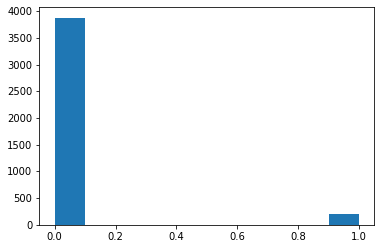

In [ ]:
plt.hist(y_train_out);

## No of ones are very less and hence is the problem

## Using SMOTE to resample and balance data

            age  ...  smoking_status_smokes
0     63.000000  ...                      0
1     61.000000  ...                      0
2     50.000000  ...                      0
3     22.000000  ...                      0
4     71.000000  ...                      0
...         ...  ...                    ...
7751  78.646866  ...                      0
7752  57.582452  ...                      0
7753  68.343894  ...                      1
7754  51.461331  ...                      0
7755  59.395521  ...                      0

[7756 rows x 16 columns]


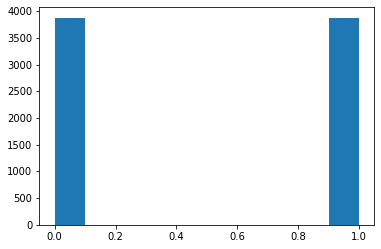

In [ ]:
from imblearn.over_sampling import SMOTE
mod=SMOTE()
x_train1,y_train1=mod.fit_resample(x_train_in,y_train_out)
plt.hist(y_train1);
print(x_train1)

We have balanced the number of 0's and 1's

# Testing resampled on different regressions

In [ ]:
#Applying Logistic Regression
#Apply l1 penalty
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
#lg=LogisticRegression()
lg.fit(x_train1,y_train1)
print(confusion_matrix(y_test_out,lg.predict(x_test_in)))
print(classification_report(y_test_out,lg.predict(x_test_in)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, lg.predict(x_test_in), average='weighted'))
print("Recall")
(recall_score(y_test_out, lg.predict(x_test_in), average='macro'))

[[836 147]
 [ 22  17]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       983
           1       0.10      0.44      0.17        39

    accuracy                           0.83      1022
   macro avg       0.54      0.64      0.54      1022
weighted avg       0.94      0.83      0.88      1022

F1 Score:
0.8799360554896365
Recall


0.6431776090982602

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out,lg.predict_proba(x_test_in)[:,1])

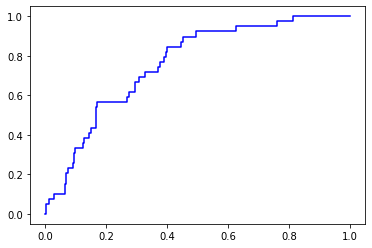

In [ ]:
plt.plot(fpr,tpr,color='blue',label='logistic')

# The recall has improved with l1 penalty and the accuracy is good

In [ ]:
df_pd_org.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Testing on XGB classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)

In [ ]:
grid.fit(x_train1, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0, max_depth=9, min_child_weight=1, n_estimators=44;, score=0.963 total time=   0.7s
[CV 2/5] END gamma=0, max_depth=9, min_child_weight=1, n_estimators=44;, score=0.988 total time=   0.6s
[CV 3/5] END gamma=0, max_depth=9, min_child_weight=1, n_estimators=44;, score=0.989 total time=   0.6s
[CV 4/5] END gamma=0, max_depth=9, min_child_weight=1, n_estimators=44;, score=0.990 total time=   0.6s
[CV 5/5] END gamma=0, max_depth=9, min_child_weight=1, n_estimators=44;, score=0.990 total time=   0.6s
[CV 1/5] END gamma=0, max_depth=8, min_child_weight=3, n_estimators=43;, score=0.957 total time=   0.5s
[CV 2/5] END gamma=0, max_depth=8, min_child_weight=3, n_estimators=43;, score=0.986 total time=   0.5s
[CV 3/5] END gamma=0, max_depth=8, min_child_weight=3, n_estimators=43;, score=0.987 total time=   0.5s
[CV 4/5] END gamma=0, max_depth=8, min_child_weight=3, n_estimators=43;, score=0.988 total time=   0.5s
[CV

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [ ]:
grid.best_estimator_

XGBClassifier(gamma=0.1, max_depth=9, min_child_weight=3, n_estimators=139)

In [ ]:
g=grid.best_estimator_.fit(x_train1,y_train1)

In [ ]:
g.score(x_train1,y_train1)

0.9904589994842703

In [ ]:
x_test_in= x_test_in[x_train1.columns]
x_test_in
g.score(x_test_in,y_test_out)

0.9187866927592955

In [ ]:
y_prediction3=g.predict(x_test_in)
cm2 = confusion_matrix(y_test_out,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, (y_prediction3), average='weighted'))
print("Recall")
print(recall_score(y_test_out, y_prediction3, average='weighted'))


[[932  51]
 [ 32   7]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       983
           1       0.12      0.18      0.14        39

    accuracy                           0.92      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.93      0.92      0.93      1022

F1 Score:
0.9263443091543595
Recall
0.9187866927592955


Recall and accuracy is good

In [ ]:
# logModel = LogisticRegression()
# param_grid = [    
#    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#    'C' : np.logspace(-4, 4, 20),
#    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#    'max_iter' : [100, 1000,2500, 5000]
#    }
# ]


In [ ]:
#The model parameters are found by executing the above code and find the best parameters
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [ ]:
best_clf = clf.fit(x_train1,y_train1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


best_clf.best_estimator_ =LogisticRegression(C=1.623776739188721)
best_params={'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
best_clf.best_params_

{'C': 1.623776739188721, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
print (f'Accuracy - : {best_clf.score(x_train1,y_train1):.3f}')

Accuracy - : 0.851


In [ ]:
best_clf.best_score_


0.8496688761535481

In [ ]:
y_prediction=best_clf.predict(x_test_in)
cm = confusion_matrix(y_test_out,y_prediction)
print(cm)
cr=classification_report(y_test_out,y_prediction)
print(cr)

[[835 148]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       983
           1       0.10      0.41      0.16        39

    accuracy                           0.83      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.94      0.83      0.88      1022



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, y_prediction, average='weighted'))
print("Recall")
(recall_score(y_test_out, y_prediction, average='weighted'))

F1 Score:
0.8785151804066738
Recall


0.8326810176125244

Recall is 0.83 and F1 is 0.88

### Lets train and test the models by dropping the unimportant variables like gender, work type and residence

In [ ]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
data_dropped=data_onehot.copy()

In [ ]:
data_dropped=data_dropped.drop(['gender_Male','bmi', 'gender_Other', 'ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children','Residence_type_Urban' ], axis=1)

In [ ]:
data_dropped.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,1,0,0
1,61.0,0,0,202.21,1,0,1,0
2,80.0,0,1,105.92,1,0,1,0
3,49.0,0,0,171.23,1,0,0,1
4,79.0,1,0,174.12,1,0,1,0


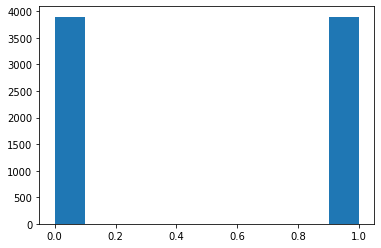

In [ ]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(x_infea3,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [ ]:
y_train4.value_counts()

0    3899
1    3899
Name: stroke, dtype: int64

In [ ]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.836


In [ ]:
best_clf2.best_score_

0.8307281893430413

In [ ]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))

[[802 160]
 [ 33  27]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       962
           1       0.14      0.45      0.22        60

    accuracy                           0.81      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.91      0.81      0.85      1022

F1 Score:
0.853030754565757
Recall


0.8111545988258317

Recall score is 0.80 and F1 Score is 0.84. Recall has improved for positive cases

## Now lets test on scaled data

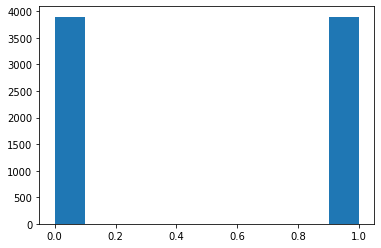

In [ ]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
scaler = StandardScaler()
scaler.fit(x_infea3)
X_scaled = scaler.transform(x_infea3)
X = pd.DataFrame(X_scaled, columns=x_infea3.columns)
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(X,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [ ]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.778


In [ ]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
from sklearn.metrics import recall_score
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))


[[712 250]
 [ 11  49]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       962
           1       0.16      0.82      0.27        60

    accuracy                           0.74      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.94      0.74      0.81      1022

F1 Score:
0.8115154022140841
Recall


0.7446183953033269

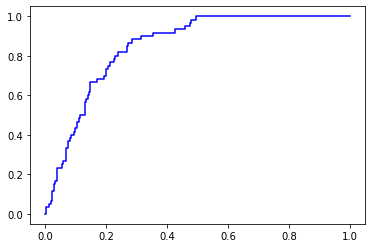

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out3,best_clf2.predict_proba(x_test_in3)[:,1])
plt.plot(fpr,tpr,color='blue',label='logistic')

Recall on Stroke prediction is good. We have more number of predicting positive stroke and that is great here


### We can see though the accuracy and precision is not that great, the recall and F1 score is good

In [ ]:
#Testing on XGB classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)
grid.fit(x_train4, y_train4)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0, max_depth=7, min_child_weight=4, n_estimators=22;, score=0.939 total time=   0.2s
[CV 2/5] END gamma=0, max_depth=7, min_child_weight=4, n_estimators=22;, score=0.943 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=7, min_child_weight=4, n_estimators=22;, score=0.935 total time=   0.1s
[CV 4/5] END gamma=0, max_depth=7, min_child_weight=4, n_estimators=22;, score=0.945 total time=   0.2s
[CV 5/5] END gamma=0, max_depth=7, min_child_weight=4, n_estimators=22;, score=0.948 total time=   0.1s
[CV 1/5] END gamma=0, max_depth=4, min_child_weight=3, n_estimators=136;, score=0.950 total time=   0.5s
[CV 2/5] END gamma=0, max_depth=4, min_child_weight=3, n_estimators=136;, score=0.974 total time=   0.5s
[CV 3/5] END gamma=0, max_depth=4, min_child_weight=3, n_estimators=136;, score=0.973 total time=   0.5s
[CV 4/5] END gamma=0, max_depth=4, min_child_weight=3, n_estimators=136;, score=0.980 total time=   0.5s

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [ ]:
grid.best_estimator_

XGBClassifier(max_depth=8, min_child_weight=3, n_estimators=143)

In [ ]:
g=grid.best_estimator_.fit(x_train4,y_train4)

In [ ]:
g.score(x_train4,y_train4)

0.972557065914337

In [ ]:
x_test_in3= x_test_in3[x_train4.columns]
x_test_in3
g.score(x_test_in3,y_test_out3)

0.9197651663405088

In [ ]:
y_prediction3=g.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))





[[934  28]
 [ 54   6]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       962
           1       0.18      0.10      0.13        60

    accuracy                           0.92      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.90      0.92      0.91      1022

F1 Score:
0.9092037584488766
Recall


0.9197651663405088

Though the accuracy is high in XGB model, the recall for positive predictions is not great

### Best model is logistic regression model with parameters as

  
    {'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
    }











Anwers to Questions

# **Is the relationship significant?**
The relationship is significant as we saw in feature importance,correlations and scores that shows that age is the most important parameter in the predictions. Older ones and formerly smoked are at higher risk of strokes.
Also the accuracy, f1 score and recalls are balanced in regression. Cross validation is applied which ensures there is no overfitting in the data. The accuracy and auc stats are good for both on training and test data. Recall is best for Logistic Regression Model.

Since the data is highly imbalanced, there are problems with training of the model. Therefore we used SMOTE



# **Are any model assumptions violated?**

Existence of outliers- There are not significant outliers in our models. We can verify this by looking at the description of the data and the percentile ranges.

Lack of strongly influencial outliers- There are no strong outliers to be worry about

Multicollinearity- We saw from the VIF  and the correlation tables that there may be some level of correlation between age, glucose level and BMI but not significant one.

 
 
# **Is there any multicollinearity in the model?**
There is no sigificant multcollinarity in the model. We can verify this using the correlation matrix and the VIF scores for the data. Though some of the vif scores are high, there is nothing to worry about


# **In the multivariate models are predictor variables independent of all the other predictor variables?**
There is no strong evidence that the variables are dependent of each other. However, there may be small relation between age and glucose level in our model

# **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**
The most significant variables are age, glucose level and hypertension. We can see from the visualization that there is some significance between age and stroke. Moreover, the risk of stroke increases with the increase in the average glucose level.


# **Does the model make sense?**

Yes our model makes sense. The logistic regression model has the highest recall while the XG Boost model has the highest accuracy. The model selection is based on what we want. We are aiming here for high recall and f1 though it may trade off the accuracy.

Here, recall is more important than precision. Predicting false negative may be lethal rather than predicting false postive.

Moreover, initially there was an imbalance in the data in predicting the stroke-

0's- 4500
1's-300


This high imbalance in data is not good for our training model and we saw that the model performed well on accuracy and precision but has poor F1 score and recall when predicting for a stroke. 

Therefore we resampled the data and saw a significant increase in the recall and f1 score.



# **Does regularization help?**

 We applied regularization l2 to our model which does not have a significant impact on our model. We can see that the lasso penalty did not have a significant increase in accuracy though it improved our model in terms of precision and recall.

# **Which independent variables are significant?**
We can see from feature importance and visualizations that the age, glucose level and hypertension are the most important parameters in predicting heart stroke. These variables are significant in predicting our target variable.



# **Which hyperparameters are important?**

The model was iterated through all the possible hyperparameters running over 4800 fits for logistic regression and finding the best parameter among it

{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

After running the iterations, we found the best fit for the model and then tweaked the model with the following hyperparameters giving the a great recall and precision.

{'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
}


This has optimized the results by giving us a high recall and a high F1 score.
































